## Pseudo Code K-means

1. Specify the number of cluster
2. Initialize centroid 
3. Compute the distance between data points and each centroid
4. Assign each data to the closest centroid
5. compute the centroid for each cluster 

In [16]:
#Import libraries

import random as rd
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from math import *
%matplotlib inline

In [17]:
mu1 = -1
mu2 = 3
sig1 = 0.5
sig2 = 1
N = 100

In [18]:
np.random.seed(10)
x11=np.random.randn(N,1)*sig1 + mu1
x12=np.random.randn(N,1)*sig1 + mu1+3
x21=np.random.randn(N,1)*sig2 + mu2
x22=np.random.randn(N,1)*sig2 + mu2+3
c = np.vstack((-np.ones((N,1)), np.ones((N,1))))
x1 = np.hstack((x11,x12))
x2 = np.hstack((x21,x22))

In [19]:
x2.shape

(100, 2)

In [20]:
X = np.hstack( (np.vstack( (x1,x2) ),c) )
np.random.shuffle(X)
dataset = pd.DataFrame(data=X, columns=['x','y','c'])

In [21]:
dataset.head()

,x,y,c
0,-0.334207,2.058738,-1.0
1,3.264395,5.636814,1.0
2,-0.669884,1.856185,-1.0
3,1.995284,4.484924,1.0
4,3.588041,4.739172,1.0


No handles with labels found to put in legend.


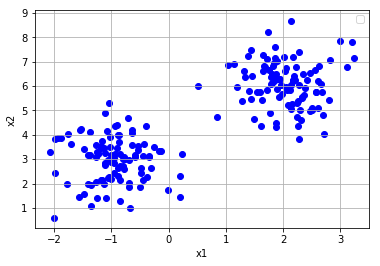

In [22]:
#PLOT GIVEN DATA

plt.scatter(x1,x2, color='blue')
plt.grid()
plt.legend(loc='best')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [23]:
#Drop column c in the data set

Dataset=dataset.drop(['c'], axis=1)

In [24]:
Dataset.head()

,x,y
0,-0.334207,2.058738
1,3.264395,5.636814
2,-0.669884,1.856185
3,1.995284,4.484924
4,3.588041,4.739172


In [30]:
#diab=pd.read_csv('pima-indians-diabetes.cvs')

In [31]:
#diab=pd.read_csv('pima-indians-diabetes.cvs')

In [169]:
#Initiaize parameters

class Kmeans():
    def __init__(self,K,iteration=20):
        self.K =K
        self.iteration=iteration

#Initialize the centroid randomy

    def Ini_center(self):
        m_rows = self.X.shape[0]

        index = np.random.permutation(m_rows)

        center = index[0:self.K]

        return self.X[center]
    
#Update centroid
    def update_centroid(self):
        for i in range(self.K):
            self.centroid[i] = np.mean(self.X[self.clusters==i])
    
#Compute the distance between centroid and each data point
    def compute_dist(self):
        cluster_dist=np.zeros((self.X.shape[0],self.K))
        for i in range(self.K):
            cluster_dist[:,i]= np.sqrt(np.sum((self.X - self.centroid[i])**2,axis=1))
        return cluster_dist
    
    
    def fit(self,X):
        self.clusters = np.zeros(X.shape[0])
        self.X = X
        self.centroid = self.Ini_center()
        for j in range(self.iteration):
            self.clusters = np.argmin(self.compute_dist(), axis=1)
            self.update_centroid()

            
    def clusters(self):
        
        return self.clusters
    
    def centroid(self):
        
        self.centroid

In [181]:
k=3
km= Kmeans(k)
km.fit(Dataset.values)

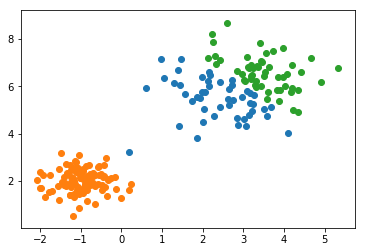

In [182]:
#Plot

km.clusters
Dataset= Dataset.assign(clusters= km.clusters) 
for i in set(Dataset['clusters']):
    plt.scatter(Dataset[Dataset['clusters']==i]['x'],Dataset[Dataset['clusters']==i]['y'])
#Dataset[Dataset['clusters']==2]

In [183]:
C=km.centroid

In [184]:
Dataset.head()

,x,y,clusters
0,-0.334207,2.058738,1
1,3.264395,5.636814,0
2,-0.669884,1.856185,1
3,1.995284,4.484924,0
4,3.588041,4.739172,0
